In [183]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../crispr_shrinkage/crispr_shrinkage/framework/')
import CrisprShrinkage as crispr_shrinkage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import expon
import numpy as np 

null_proportion = 0.5
positive_proportion = 0.6
target_null_proportion = 0.5
target_positive_population = 0.7

num_ctrl_guides = 200
num_pos_guides = 50

reps = 3
max_dup_factor = 30
max_guide_molecule_factor = 50

pop1_dup_factor_list = np.asarray([np.round(uniform.rvs(1, max_dup_factor)) for _ in range(reps)])
pop2_dup_factor_list = np.asarray([np.round(uniform.rvs(1, max_dup_factor)) for _ in range(reps)])

#expon.rvs(loc=1, scale=1000, size=num_guides)
#uniform.rvs(2, 200, size=num_guides)
def get_counts(num_guides, proportion):
    pop1_list_reps = []
    pop2_list_reps = []

    for rep_i in range(reps):
        n_list = np.round(uniform.rvs(2, max_guide_molecule_factor, size=num_guides)).astype(int)
        pop1_list = binom.rvs(n_list, proportion, size=num_guides) 
        pop2_list = n_list - pop1_list

        pop1_list_reps.append(pop1_list * pop1_dup_factor_list[rep_i])
        pop2_list_reps.append(pop2_list * pop2_dup_factor_list[rep_i])
    
    return np.asarray(pop1_list_reps), np.asarray(pop2_list_reps)


In [185]:
tiling_length = 300

observation_guides = []
for position in range(tiling_length):
    counts = get_counts(1, target_null_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="observation_{}".format(position), position=position, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    observation_guides.append(guide)

observation_guides = np.asarray(observation_guides)

In [186]:
negative_guides = []
for i in range(num_ctrl_guides):
    counts = get_counts(1, null_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="negative_{}".format(i), position=None, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    negative_guides.append(guide)

negative_guides = np.asarray(negative_guides)

In [187]:
positive_guides = []
for i in range(num_pos_guides):
    counts = get_counts(1, positive_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="positive_{}".format(i), position=None, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    positive_guides.append(guide)

positive_guides = np.asarray(positive_guides)

Optimizing imputation weights
X: [0.01899345 8.22194555], f: 0.01260953710327694
X: [0.01899345 5.43100614], f: 0.01089943372428461
X: [0.01899345 5.43100614], f: 0.01089943372428461
X: [0.01899345 5.43100614], f: 0.01089943372428461
X: [0.01899345 5.43100614], f: 0.01089943372428461
X: [0.01899345 5.43100614], f: 0.01089943372428461
X: [0.00860948 5.71269651], f: 0.005358996629735318
X: [0.0044348  2.72330979], f: 0.002197875366739448
X: [0.0044348  2.72330979], f: 0.002197875366739448
X: [0.0038588  2.84552684], f: 0.002149600033587236
X: [0.00371141 2.51854353], f: 0.0019774479625935433
X: [0.0044348  0.24317764], f: 0.0012057275633000962
X: [0.0044348  0.24317764], f: 0.0012057275633000962
X: [0.0044348  0.24317764], f: 0.0012057275633000962
X: [0.00425295 0.12324235], f: 0.0011572977175678854
X: [0.00425295 0.12324235], f: 0.0011572977175678854
X: [0.003665   0.18629756], f: 0.0011479973460390657
X: [0.003665   0.18629756], f: 0.0011479973460390657
X: [0.00384359 0.12347255], f: 0

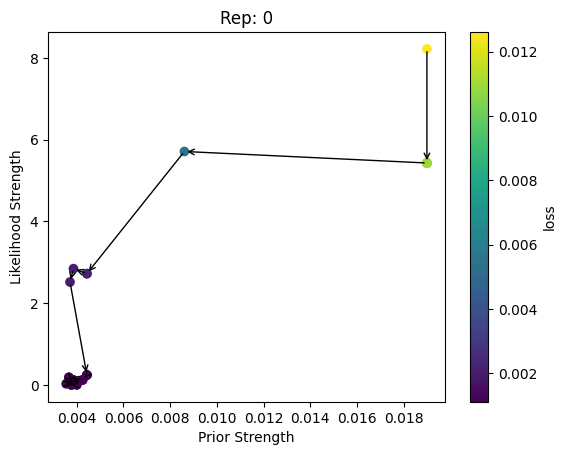

KL Negative Set Average: 0.000781333066594705
KL Positive Set Average: 0.007255024325404116
KL Observation Set Average: 0.00031642789045560783
KL Combined Set Average: 0.00111626581222878
X: [0.2659814  6.99365629], f: 0.23704398186885658
X: [0.02174917 8.94136714], f: 0.019498792719086302
X: [0.00805832 5.8353645 ], f: 0.00714199105585935
X: [0.00805832 5.8353645 ], f: 0.00714199105585935
X: [4.14555748e-03 5.97105353e+00], f: 0.005014717947701486
X: [4.14555748e-03 5.97105353e+00], f: 0.005014717947701486
X: [4.14555748e-03 5.97105353e+00], f: 0.005014717947701486
X: [4.14555748e-03 5.97105353e+00], f: 0.005014717947701486
X: [4.10529792e-03 5.30422643e+00], f: 0.004616149301109591
X: [2.58228249e-03 4.70961564e+00], f: 0.003838108156435347
X: [0.00260029 0.62343675], f: 0.0021463840189646665
X: [0.00250857 0.46326636], f: 0.00213778114456106
X: [0.00250857 0.46326636], f: 0.00213778114456106
X: [0.00282837 0.34903384], f: 0.002122110082372663
X: [0.00282837 0.34903384], f: 0.0021221

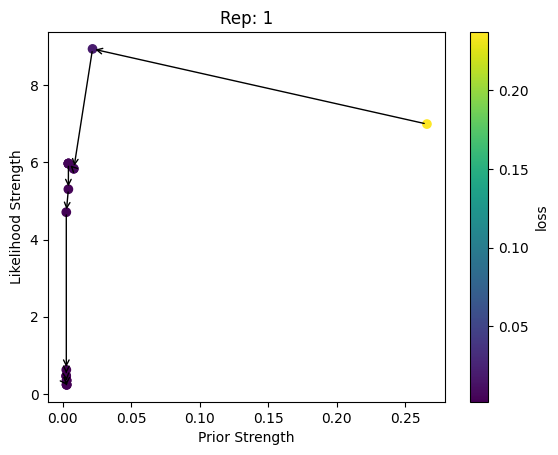

KL Negative Set Average: 0.0020978636413172503
KL Positive Set Average: 0.014339014413305727
KL Observation Set Average: 9.864170727844327e-05
KL Combined Set Average: 0.0021202108383859444
X: [0.14840574 7.46336846], f: 0.14616278628767015
X: [0.14840574 7.46336846], f: 0.14616278628767015
X: [0.14840574 7.46336846], f: 0.14616278628767015
X: [0.03599762 8.96445766], f: 0.03235242315011182
X: [0.02216328 6.60671482], f: 0.01818874708632213
X: [0.02216328 6.60671482], f: 0.01818874708632213
X: [0.02216328 6.60671482], f: 0.01818874708632213
X: [0.02216328 6.60671482], f: 0.01818874708632213
X: [0.02264598 2.4940073 ], f: 0.017328838940405593
X: [0.00918484 4.38177572], f: 0.0059232164632868735
X: [0.00685281 2.80547301], f: 0.003745388392691351
X: [0.0064059  2.31682918], f: 0.0033287199967501273
X: [0.00377741 3.18326629], f: 0.0019255551706041402
X: [0.00377741 3.18326629], f: 0.0019255551706041402
X: [1.78766306e-03 3.58204194e+00], f: 0.001490475117436989
X: [0.00221298 2.20676192]

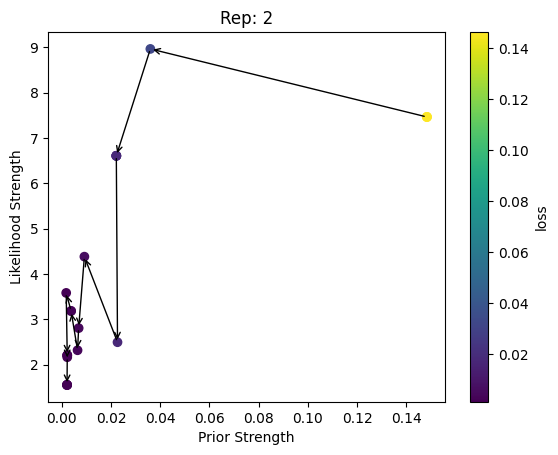

KL Negative Set Average: 0.0014467829755214457
KL Positive Set Average: 0.007847796276417497
KL Observation Set Average: 3.207731579709476e-05
KL Combined Set Average: 0.001257035643025986
Selected imputation weights: (array([0.00385062, 0.00287225, 0.00212668]), array([1.00000000e-06, 2.32314368e-01, 1.55198149e+00]))
Optimizing shrinkage prior weights


../crispr_shrinkage/crispr_shrinkage/framework\CrisprShrinkage.py:426: OptimizeWarning: Unknown solver options: factr
  res = scipy.optimize.minimize(optimize_shrinkage_model_weights_p, bounds=[(0.000001, 500)], method="L-BFGS-B", callback=store_values) # TODO: Set bounds as just positive - ask chatgpt how...


X: [0.93598694], f: 0.47230747034859855
X: [0.81325737], f: 0.027006472476054366
X: [0.76515508], f: 0.004318803600522614
X: [0.7795705], f: 2.3734054721558095e-05
X: [0.77859459], f: 1.9180268484575436e-08
X: [0.77856601], f: 0.0


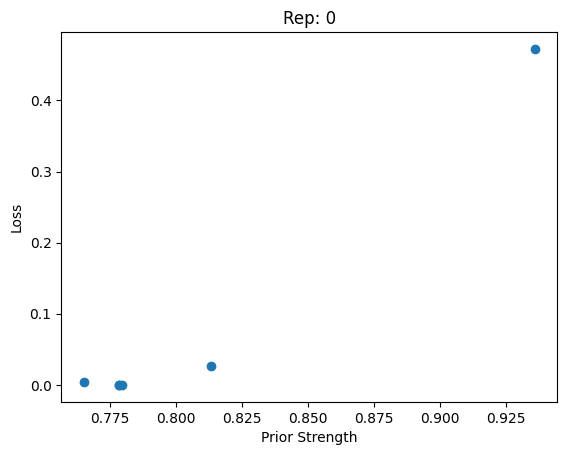

X: [0.75217846], f: 0.0013668477846784377
X: [0.73779167], f: 0.000136706608977466
X: [0.74127111], f: 1.3437584378550582e-08
X: [0.7412374], f: 2.609024107869118e-12
X: [0.7412369], f: -1.1102230246251565e-13


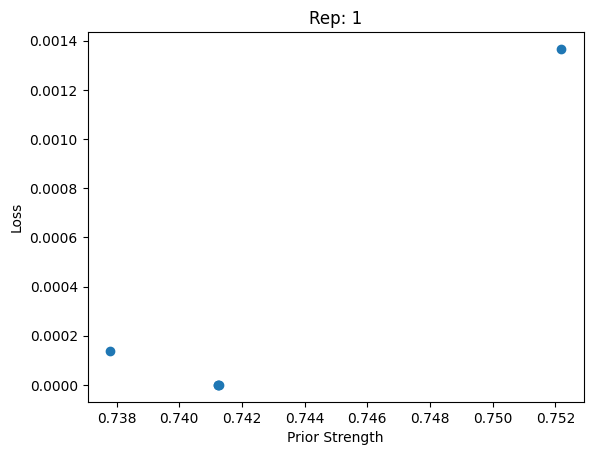

X: [0.8403552], f: 0.027009457090942934
X: [0.80141166], f: 0.007030665943541514
X: [0.81508062], f: 2.4207445881163636e-05
X: [0.81433744], f: 1.9769352821441544e-08
X: [0.81431549], f: 4.440892098500626e-13


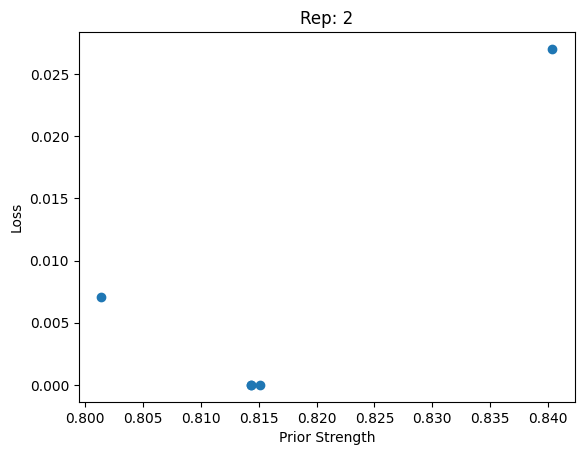

Selected shrinkage weights: [0.77856601 0.7412369  0.81431549]
NEGATIVE_CONTROLS
Shrinkage Prior: a=[2646.5        2689.66666667 2475.28571429], b=[2671.40740741 2642.         2589.66666667]
Shrinkage Prior: a=[2646.5        2689.66666667 2475.28571429], b=[2671.40740741 2642.         2589.66666667]
Shrinkage Prior: a=[2646.5        2689.66666667 2475.28571429], b=[2671.40740741 2642.         2589.66666667]
Shrinkage Prior: a=[2646.5        2689.66666667 2475.28571429], b=[2671.40740741 2642.         2589.66666667]
Shrinkage Prior: a=[2646.5        2689.66666667 2475.28571429], b=[2671.40740741 2642.         2589.66666667]
Shrinkage Prior: a=[2646.5        2689.66666667 2475.28571429], b=[2671.40740741 2642.         2589.66666667]
Shrinkage Prior: a=[2646.5        2689.66666667 2475.28571429], b=[2671.40740741 2642.         2589.66666667]
Shrinkage Prior: a=[2646.5        2689.66666667 2475.28571429], b=[2671.40740741 2642.         2589.66666667]
Shrinkage Prior: a=[2646.5        2689.

In [188]:
# LEFTOFF - just modifed result to return each guide set separately. So should be able to plot by position and verify that the shrinkage and all works well. Very interested to see if the negatiev controls are over shrunk. and positive controls. since they dont have position.
results = crispr_shrinkage.perform_adjustment(
    negative_control_guides = negative_guides,
    positive_control_guides = positive_guides,
    observation_guides = observation_guides,
    num_replicates = reps,
    include_observational_guides_in_fit = True,
    include_positive_control_guides_in_fit = False,
    pop1_amplification_factors = pop1_dup_factor_list,
    pop2_amplification_factors = pop2_dup_factor_list,
    monte_carlo_trials = 1000,
    enable_spatial_prior =  True,
    spatial_bandwidth = 3,
    spatial_imputation_model_weights = None,
    baseline_proportion = 0.5, # TODO: Perform validation between (0,1), also accept None value for perfrming no normalization (or have that be another argument)
    shrinkage_prior_strength = None,
    posterior_estimator = "mean",
    random_seed = 234
    )

In [ ]:
# LEFTOFF 2/11/23 2:56pm: Shrinkage weights are insanely high, diagnose.

In [173]:
positive_positions = [guide.position for guide in results.adjusted_positive_control_guides]
observational_position = [guide.position for guide in results.adjusted_observation_guides]

In [175]:
negative_lfc = [guide.LFC_estimate_combined for guide in results.adjusted_negative_control_guides]
positive_lfc = [guide.LFC_estimate_combined for guide in results.adjusted_positive_control_guides]
observational_lfc = [guide.LFC_estimate_combined for guide in results.adjusted_observation_guides]

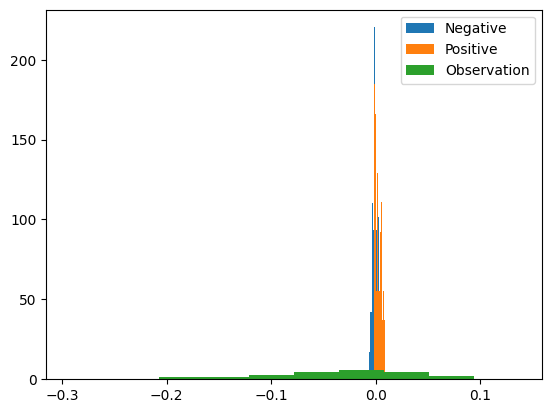

In [178]:
import matplotlib.pyplot as plt
plt.hist(negative_lfc, density=True, label="Negative")
plt.hist(positive_lfc, density=True, label="Positive")
plt.hist(observational_lfc, density=True, label="Observation")
plt.legend()

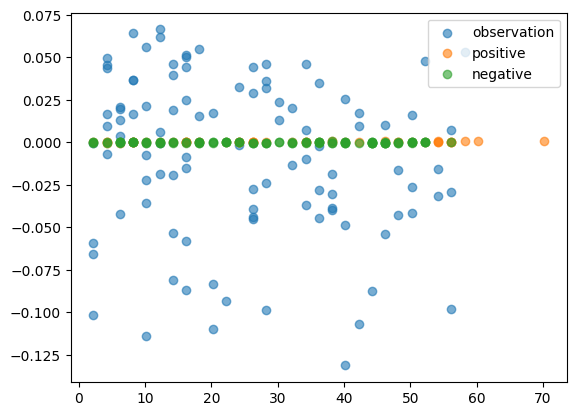

In [181]:
rep_i = 0 
observational_lfc_rep = [guide.LFC_estimate_per_replicate[rep_i] for guide in results.adjusted_observation_guides]
observational_count_rep = [guide.pop1_normalized_count_reps[rep_i] + guide.pop1_normalized_count_reps[rep_i] for guide in results.adjusted_observation_guides]

positive_lfc_rep = [guide.LFC_estimate_per_replicate[rep_i] for guide in results.adjusted_positive_control_guides]
positive_count_rep = [guide.pop1_normalized_count_reps[rep_i] + guide.pop1_normalized_count_reps[rep_i] for guide in results.adjusted_positive_control_guides]

negative_lfc_rep = [guide.LFC_estimate_per_replicate[rep_i] for guide in results.adjusted_negative_control_guides]
negative_count_rep = [guide.pop1_normalized_count_reps[rep_i] + guide.pop1_normalized_count_reps[rep_i] for guide in results.adjusted_negative_control_guides]

plt.scatter(observational_count_rep, observational_lfc_rep, alpha=0.6, label="observation")
plt.scatter(positive_count_rep, positive_lfc_rep, alpha=0.6, label="positive")
plt.scatter(negative_count_rep, negative_lfc_rep, alpha=0.6, label="negative")
plt.legend()
plt.show()

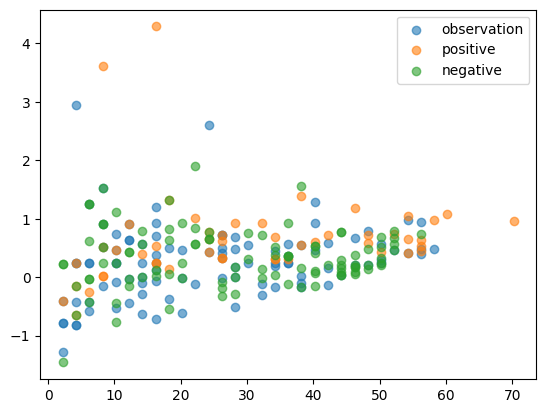

In [182]:
rep_i = 0 
observational_raw_lfc_rep = [np.log(guide.pop1_raw_count_reps[rep_i]/guide.pop2_raw_count_reps[rep_i]) for guide in results.raw_observation_guides]

positive_raw_lfc_rep = [np.log(guide.pop1_raw_count_reps[rep_i]/guide.pop2_raw_count_reps[rep_i]) for guide in results.raw_positive_control_guides]

negative_raw_lfc_rep = [np.log(guide.pop1_raw_count_reps[rep_i]/guide.pop2_raw_count_reps[rep_i]) for guide in results.raw_negative_control_guides]

plt.scatter(observational_count_rep, observational_raw_lfc_rep, alpha=0.6, label="observation")
plt.scatter(positive_count_rep, positive_raw_lfc_rep, alpha=0.6, label="positive")
plt.scatter(negative_count_rep, negative_raw_lfc_rep, alpha=0.6, label="negative")
plt.legend()
plt.show()

In [ ]:
plt.scatter(observational_count_rep, observational_raw_lfc_rep, alpha=0.6, label="observation")
plt.scatter(positive_count_rep, positive_raw_lfc_rep, alpha=0.6, label="positive")
plt.scatter(negative_count_rep, negative_raw_lfc_rep, alpha=0.6, label="negative")
plt.legend()
plt.show()

In [ ]:
# LEFTOFF: It seems that the shrinkage optimization is not working appropriately. I wonder if it is due to the position-less guide counts. Try and increase the position-containing positive control guides to see how the respond to shrinkage. Also compare the LFC before and after and validate where shrinkage is. Would also be nice to create another simulation example to test neighborhood. Also try and plot intermediate plots in the package (i.e. visualizing and logging optimization performance.)

In [ ]:
plt.scatter(observational_position, observational_lfc)

In [ ]:
crispr_shrinkage.Guide